In [1]:
#!pip install pytorch_lightning
!pip install scikit-network
!pip install git+https://github.com/SberProcessMining/Sber_Process_Mining.git
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.1 MB 14.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SberProcessMining/Sber_Process_Mining.git to /tmp/pip-req-build-787ijy1l
  Running command git clone -q https://github.com/SberProcessMining/Sber_Process_Mining.git /tmp/pip-req-build-787ijy1l
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 25.7 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23667 sha256=4681d2ddf4d73bb4d44cdfddb0092e3d4c0555237721798730dd9e679bf05418
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23602 sha256=944a9ad7127c6cfcd0961705a5f007a51716c705a96f1a73c6ead82d2b2bc8f1
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [1]:
import sberpm
import pandas as pd
from sberpm.miners import SimpleMiner,CausalMiner, HeuMiner,AlphaPlusMiner, AlphaMiner, InductiveMiner
from sberpm.miners._abstract_miner import AbstractMiner
%matplotlib inline
from sberpm.visual import GraphvizPainter
import matplotlib.pyplot as plt
from sberpm import DataHolder
import networkx as nx
from sberpm.metrics import ActivityMetric, TransitionMetric, IdMetric, TraceMetric, UserMetric,TokenReplay
import pm4py
from sberpm.ml.reinforcement_learning import RLOptimizer

In [55]:
import sys
sys.path.append('/content/drive/MyDrive/Drill planner/Code')

In [56]:
data = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Dataset2.xlsx')

In [63]:
data['Operation code'] = data['Operation code'].astype(int)
burek = data[data['Phase'] == 'БУРЭК']
burek['Operation code'] = burek['Operation code'].astype(int)
data_holder = DataHolder(data=burek, 
                         id_column='Well number', 
                         activity_column='Operation code', 
                         start_timestamp_column='Timestamp', 
                         time_format='%Y.%m.%d')

# Exploration strategy

In [64]:
default_env_params = {
    'clear_start_outliers': False
}

default_agent_params = {
    'discount': 0.9,
    'alpha': 0.09,
    'epsilon': 0.5,
    'eps_scaling': 0.9992,
    'with_prob': False
}

default_reward_design = {
    'default_reward': 15,
    'increased_reward': 0,
    'finish_reward': 100,
    'duration_reward': 0.1,
    'cycle_penalty': 20,
    'final_cycle_reward': 150,
    'presence_reward': 1500
}

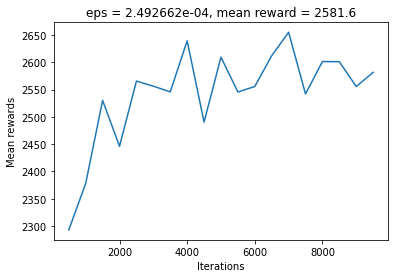

In [65]:
rl = RLOptimizer(data_holder, strategy='exploration')  # default env_args and agent_args
rl.define_rewards() # default reward_design
result = rl.fit()

In [66]:
result.iloc[1102]['trace']

('302', '317', '401', '415', '323', '308', '317', '401', '348', 'end')

In [67]:
rl.get_optimal_paths()

,trace,duration,reward,num_of_cycles,presence_in_data
803,"(303, 328, 316, 406, 324, 425, 318, 401, 348, ...",518.75000,1402.625000,0,0
570,"(302, 317, 406, 201, 343, 420, 415, 323, 401, ...",981.37987,3850.362013,0,0


In [68]:
_ = [print(el) for el in rl.get_optimal_paths()['trace'].values]

('303', '328', '316', '406', '324', '425', '318', '401', '348', 'end')
('302', '317', '406', '201', '343', '420', '415', '323', '401', '348', 'end')


# Exploitation strategy

In [74]:
key_states = [print(st) for st in data_holder.data[data_holder.activity_column].unique() if '3' in st]
key_states

303
318
323
343
324
315
308
317
348
347
316
437
342
302
403
307
344
213
346
328


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [53]:
default_env_params = {
    'shuffle': True
}

default_agent_params = {
    'discount': 0.9,
    'alpha': 0.1
}

default_reward_design = {
    'default_reward': 2,
    'increased_reward': 0,
    'finish_reward': 20,
    'duration_reward': 10,
    'cycle_penalty': 30,
    'final_cycle_reward': 10
}

In [54]:
rl = RLOptimizer(data_holder, strategy='exploitation')  
rl.define_rewards(key_states=key_states)
result = rl.fit()

ZeroDivisionError: ignored

In [ ]:
result

In [ ]:
rl.get_optimal_paths()